In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

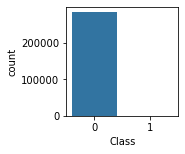

In [7]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.countplot('Class', data=df, ax=ax)

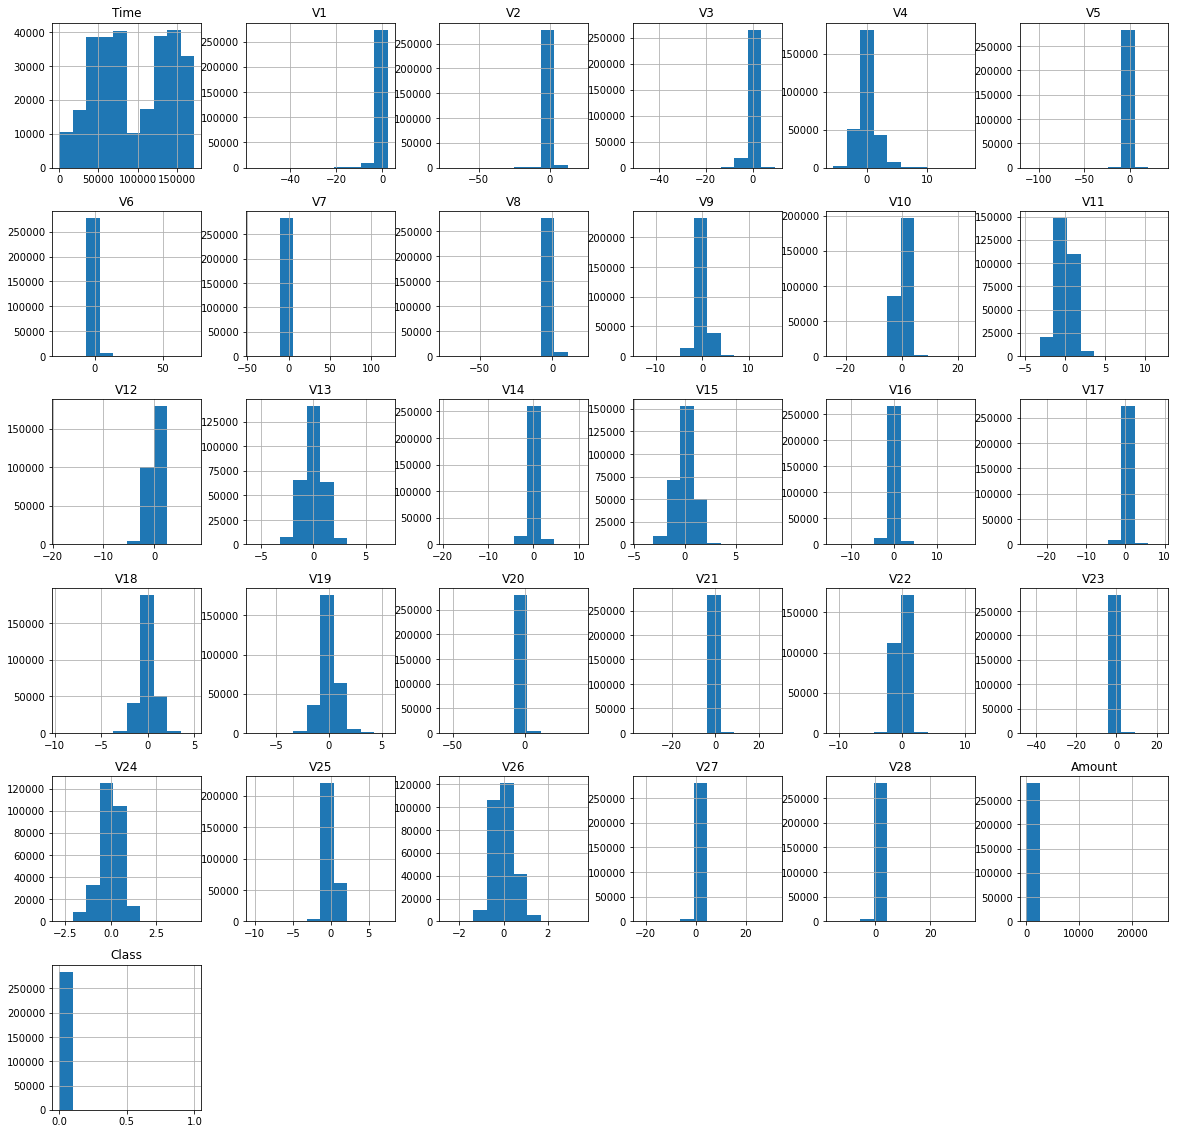

In [8]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

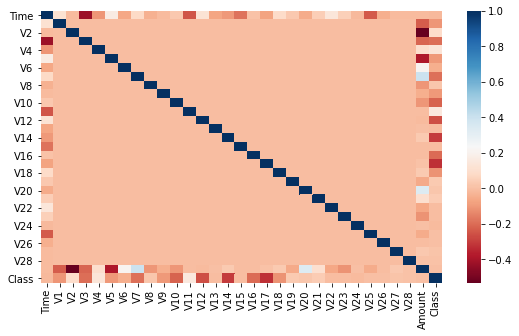

In [9]:
plt.figure(figsize=(9,5))
corr = df.corr()
sns.heatmap(corr,cmap="RdBu")

In [10]:
df.corrwith(df["Class"]).sort_values(ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64

## 결측치

In [11]:
nan_dict = {"CNT":df.isin([0]).sum(),
            "RATE": df.isin([0]).sum()/df.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

           CNT       RATE
Class   284315  99.827251
Amount    1825   0.640785
Time         2   0.000702


In [12]:
nan_dict = {"CNT":df.isna().sum(),
            "RATE": df.isna().sum()/df.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

Empty DataFrame
Columns: [CNT, RATE]
Index: []


In [13]:
def mysplit(df, test_size=0.3) :
    df_X = df.iloc[:, :-1]
    df_y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=test_size, random_state=0, stratify=df_y)   #------Stratified 기반 분할
    return  X_train, X_test, y_train, y_test

In [14]:
def myscore(y_test, pred, proba, pr_curve=0, auc_curve=0): 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    print(f'Accuracy:{accuracy:.6f}, Precision:{precision:.6f}, Recall:{recall:.6f}, F1:{f1:.6f}')
    mtx = confusion_matrix(y_test, pred)
    print(mtx)
    if pr_curve==1:
        mycurve(y_test, proba)
    if auc_curve==1:
        mycurve_auc(y_test, proba)

In [15]:
def modeling(model, X_train, X_test,y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict(X_test)
    myscore(y_test,pred,proba)

In [16]:
def mycurve(y_test, proba):  
    precision, recall, thresholds = precision_recall_curve(y_test, proba[ : , -1])
    print(len(precision), len(recall), len(thresholds))  #66 66 65
    plt.plot(thresholds, precision[:len(thresholds)], label="precision")
    plt.plot(thresholds, recall[:len(thresholds)], label="recall")
    plt.xlabel("thresholds")
    plt.ylabel("score")
    plt.grid()
    plt.legend()
    plt.show()

In [17]:
def mycurve_auc(y_test, proba):  
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,-1])
    print(len(fpr), len(tpr), len(thresholds)) 
    plt.plot(fpr, tpr, label="roc")
    plt.plot([0,1], [0,1], label="th:0.5")
    plt.xlabel("FPR (1-TNR(specificity)")      
    plt.ylabel("TPR (recall,sensitivity)") 
    plt.title(f"auc : {roc_auc_score(y_test, proba[:,-1]):.4f}")
    plt.grid()
    plt.legend()
    plt.show()

In [59]:
def myoutlier(df=None, column=None, weight=1.5):
    df = df[df['Class']==1][column]
    p25 = np.percentile(df.values, 25)
    p75 = np.percentile(df.values, 75)
    IQR = (p75 - p25) * weight
    low_limit  = p25 - IQR
    high_limit = p75 + IQR
    outlier_idx = df[(df < low_limit) | (df > high_limit)].index.values.tolist()
    return outlier_idx

# outlier

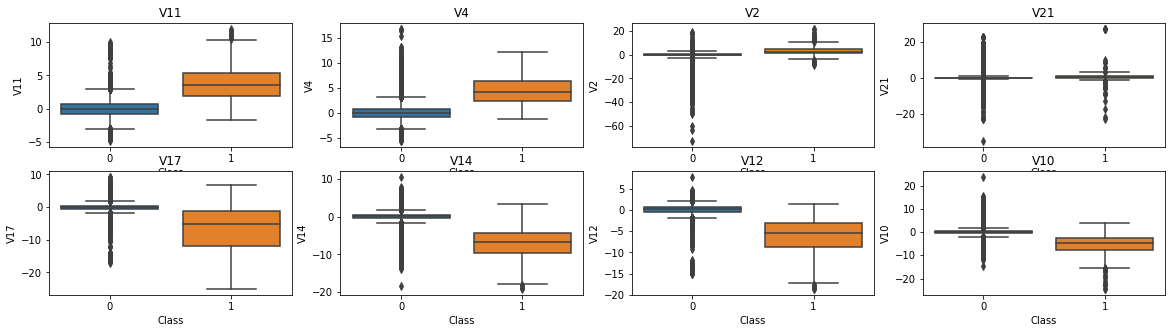

In [19]:
positive=['V11', 'V4', 'V2', 'V21']
negative=['V17', 'V14', 'V12', 'V10'] #, 'V16']
pos_neg = positive + negative
# print(cols)
f, axes = plt.subplots(2,4, figsize=(20,5))
# sns.boxplot(x="Class", y=col, data=df, ax=axes[0][0])
# sns.boxplot(x="Class", y=col, data=df, ax=axes[0][1])
# sns.boxplot(x="Class", y=col, data=df, ax=axes[0][2])
# sns.boxplot(x="Class", y=col, data=df, ax=axes[0][3])

# sns.boxplot(x="Class", y=col, data=df, ax=axes[1][0])
# sns.boxplot(x="Class", y=col, data=df, ax=axes[1][1])
# sns.boxplot(x="Class", y=col, data=df, ax=axes[1][2])
# sns.boxplot(x="Class", y=col, data=df, ax=axes[1][3])

for i, feature in enumerate(pos_neg):
    cols = i%4
    rows = i//4     
    sns.boxplot(x="Class", y=feature, data=df, ax=axes[rows][cols])
    axes[rows][cols].set_title(feature)

In [20]:
for col in pos_neg:
    res = myoutlier(df=df, column=col, weight=1.5)
    print(col,  len(res), "\t\t", res)

V11 10 		 [8296, 8335, 8615, 9035, 9179, 9252, 9487, 9509, 10568, 10801]
V4 0 		 []
V2 46 		 [14211, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16780, 17317, 17366, 17407, 17453, 17480, 33276, 82400, 83297, 102441, 102442, 102443, 102444, 102445, 102446, 151006, 151007, 151008, 151009, 151462, 151519, 152223, 152295, 153823, 153835, 154234, 154371, 154587, 154684, 176049, 249607, 258403, 274382]
V21 49 		 [10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 42958, 43204, 44223, 44270, 77682, 102441, 102442, 102443, 102444, 102445, 102446, 144754, 149145, 149600, 151006, 151007, 151008, 151009, 151011, 151462, 151519, 151730, 151807, 152019, 152223, 152295, 153823, 153835, 153885, 154234, 154371, 154587, 154684, 167184, 167305, 189878, 231978, 272521]
V17 0 		 []
V14 4 		 [8296, 8615, 9035, 9252]
V12 6 		 [8296, 8615, 150601, 150644, 150647, 150654]
V10 19 		 [44223, 44270, 150679, 150680, 150697, 151006, 151007, 151008, 

(0.0, 172792.0)

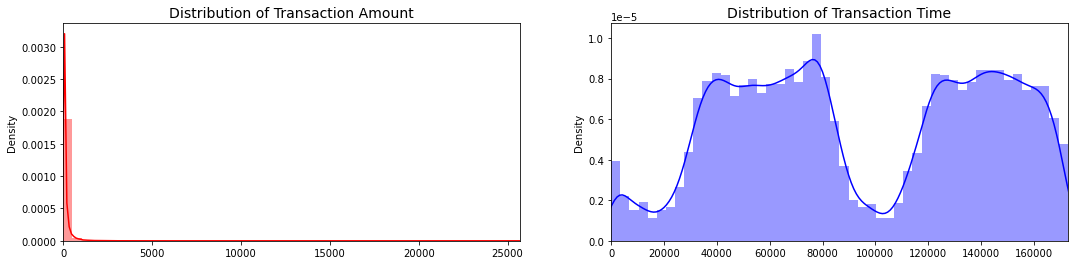

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

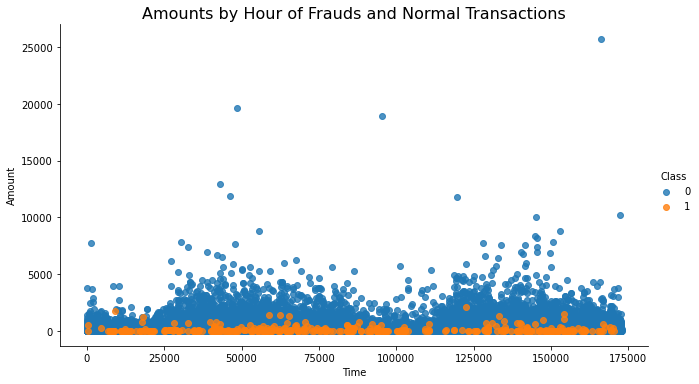

In [22]:
ax = sns.lmplot(y="Amount", x="Time", fit_reg=False, aspect=1.8, data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)
plt.show()

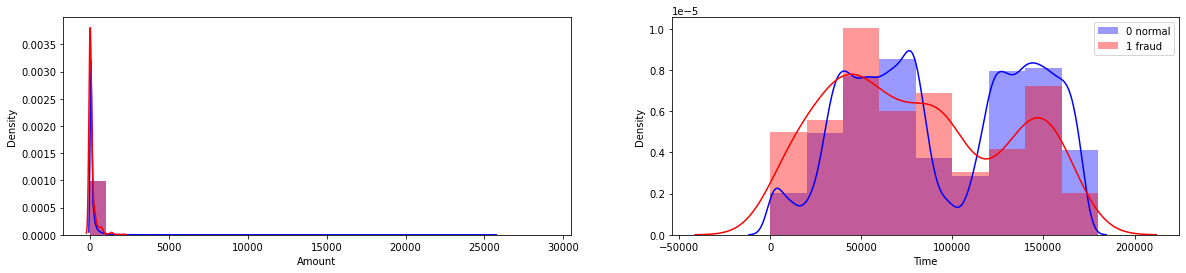

In [23]:
fig, axes = plt.subplots(figsize=(20, 4), ncols=2)
# plt.xticks(range(0, 30000, 1000), rotation=60)

bins = np.arange(0, 30000, 1000)
sns.distplot(df[df['Class']==0]['Amount'] , ax=axes[0], bins=bins, color='b', label='0 normal')
sns.distplot(df[df['Class']==1]['Amount'] , ax=axes[0], bins=bins, color='r', label='1 fraud')

bins = np.arange(0, 200000, 20000)
sns.distplot(df[df['Class']==0]['Time'] , ax=axes[1], bins=bins, color='b', label='0 normal')
sns.distplot(df[df['Class']==1]['Time'] , ax=axes[1], bins=bins, color='r', label='1 fraud')

plt.legend()
plt.show()

# score

In [24]:
df.drop(["Time"], axis = 1,inplace= True)

In [48]:
# amount?

In [25]:
X_train, X_test, y_train, y_test = mysplit(df)

Accuracy:0.999251, Precision:0.901957, Recall:0.874842, F1:0.887924
[[85268    27]
 [   37   111]]
3 3 2


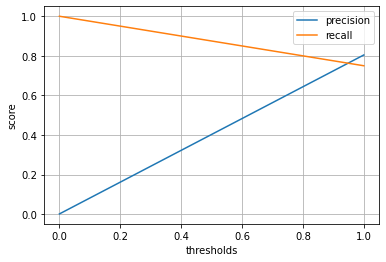

3 3 3


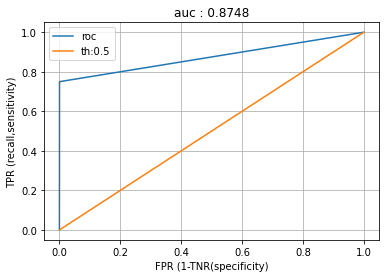

In [26]:
dt = DecisionTreeClassifier(random_state=36)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
proba = dt.predict_proba(X_test)
myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)

Accuracy:0.966211, Precision:0.516062, Recall:0.807706, F1:0.522577
[[82460  2835]
 [   52    96]]
17073 17073 17072


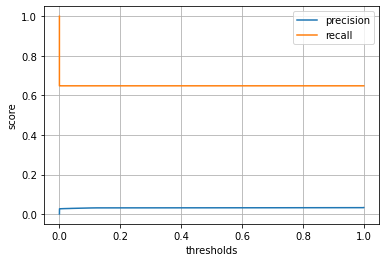

5072 5072 5072


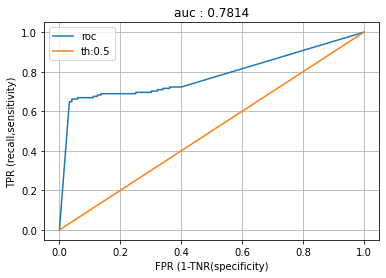

In [27]:
LGBM = LGBMClassifier(random_state=36)
LGBM.fit(X_train, y_train)
pred = LGBM.predict(X_test)
proba = LGBM.predict_proba(X_test)
myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)

Accuracy:0.999134, Precision:0.914856, Recall:0.814078, F1:0.857475
[[85276    19]
 [   55    93]]
81876 81876 81875


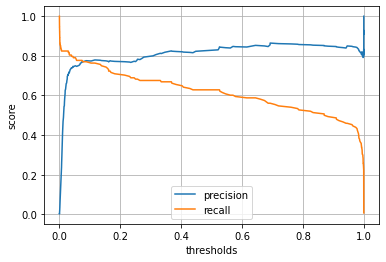

1729 1729 1729


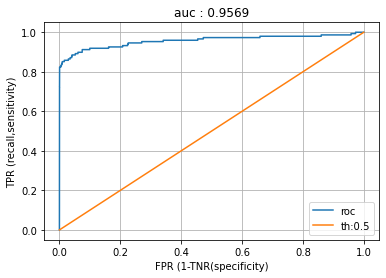

In [28]:
lr = LogisticRegression(random_state=36)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
proba = lr.predict_proba(X_test)
myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)

In [29]:
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics  import classification_report_imbalanced
from sklearn.metrics   import classification_report
from sklearn.pipeline  import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.utils     import shuffle


In [64]:
X_train, X_test, y_train, y_test = mysplit(df)
X_train_NearMiss, y_train_NearMiss = NearMiss().fit_resample(X_train.values, y_train.values)
X_test_NearMiss, y_test_NearMiss   = NearMiss().fit_resample(X_test.values, y_test.values)
y, counts = np.unique(y_train_NearMiss, return_counts=True)
print(y, counts)
y, counts = np.unique(y_test_NearMiss, return_counts=True)
print(y, counts)

[0 1] [344 344]
[0 1] [148 148]


In [66]:
df = df.sample(frac=1) #shuffle
df1 = df.loc[df['Class'] == 1]
df0 = df.loc[df['Class']==0][:len(df1)]
under_df_f1f0 = pd.concat([df1, df0])
under_df = under_df_f1f0.sample(frac=1, random_state=42)

<AxesSubplot:xlabel='Class', ylabel='count'>

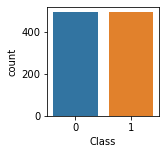

In [32]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.countplot('Class', data=under_df, ax=ax)

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_resampled_test, y_resampled_test = rus.fit_resample(X_test, y_test)



print('RUS 적용 후 X_train_under: ', X_resampled.shape, y_resampled.shape)
print('RUS 적용 후 y_train_under:\n', pd.Series(y_resampled).value_counts())

RUS 적용 후 X_train_under:  (688, 29) (688,)
RUS 적용 후 y_train_under:
 1    344
0    344
Name: Class, dtype: int64


Accuracy:0.800676, Precision:0.828397, Recall:0.800676, F1:0.796379
[[ 97  51]
 [  8 140]]
3 3 2


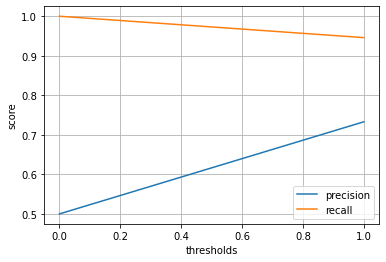

3 3 3


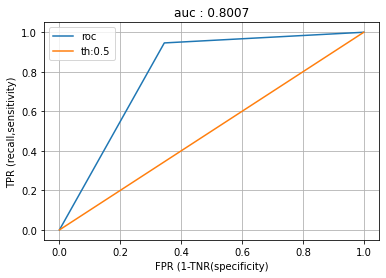

In [70]:
dt = DecisionTreeClassifier(random_state=36)
dt.fit(X_train_NearMiss, y_train_NearMiss)
pred_dt = dt.predict(X_test_NearMiss)
proba_dt = dt.predict_proba(X_test_NearMiss)
myscore(y_test_NearMiss, pred_dt, proba_dt, pr_curve=1, auc_curve=1)



Accuracy:0.918919, Precision:0.919225, Recall:0.918919, F1:0.918904
[[138  10]
 [ 14 134]]
213 213 212


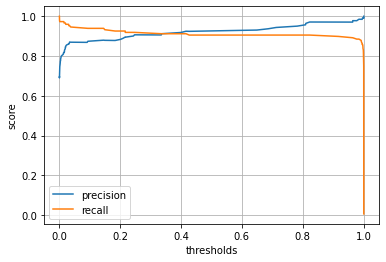

40 40 40


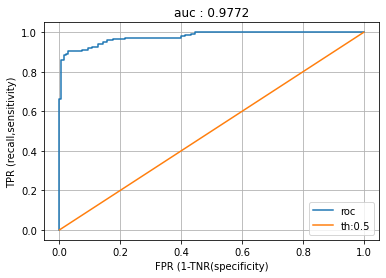

In [58]:
LGBM = LGBMClassifier(random_state=36)
LGBM.fit(X_resampled, y_resampled)
pred_LGBM = LGBM.predict(X_resampled_test)
proba_LGBM = LGBM.predict_proba(X_resampled_test)
myscore(y_resampled_test, pred_LGBM, proba_LGBM, pr_curve=1, auc_curve=1)

In [35]:
from imblearn.over_sampling import SMOTE
df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = mysplit(df)

smote = SMOTE(random_state=0)
print('SMOTE 적용 전 X_train ', X_train.shape, y_train.shape)
X_train_over, y_train_over = SMOTE(random_state=0).fit_resample(X_train, y_train)
print('SMOTE 적용 후 X_train_over: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 y_train_over:\n', pd.Series(y_train_over).value_counts())


SMOTE 적용 전 X_train  (199364, 29) (199364,)
SMOTE 적용 후 X_train_over:  (398040, 29) (398040,)
SMOTE 적용 후 y_train_over:
 1    199020
0    199020
Name: Class, dtype: int64


Accuracy:0.984680, Precision:0.544158, Recall:0.914759, F1:0.576314
[[84009  1286]
 [   23   125]]
76383 76383 76382


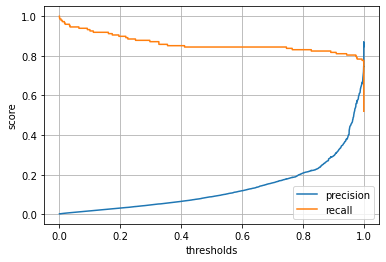

1710 1710 1710


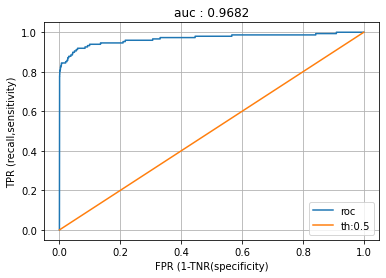

In [36]:
lr = LogisticRegression(random_state = 36)
lr.fit(X_train_over,y_train_over)
pred_lr = lr.predict(X_test)
proba_lr = lr.predict_proba(X_test)
myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)

Accuracy:0.998935, Precision:0.827705, Recall:0.905036, F1:0.862271
[[85232    63]
 [   28   120]]
62212 62212 62211


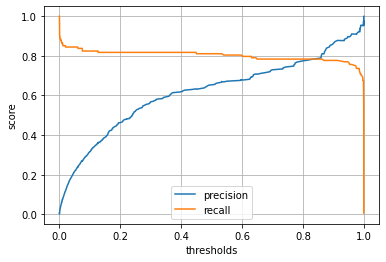

5711 5711 5711


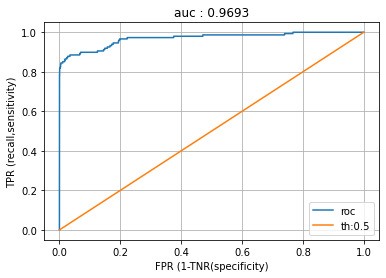

In [37]:
LGBM = LGBMClassifier(random_state=36)
LGBM.fit(X_train_over,y_train_over)
pred_LGBM = LGBM.predict(X_test)
proba_LGBM = LGBM.predict_proba(X_test)
myscore(y_test, pred_LGBM, proba_LGBM, pr_curve=1, auc_curve=1)

In [38]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    print(confusion)
    print("정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [39]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [40]:
card_df=pd.read_csv("creditcard.csv")

In [41]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [42]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [43]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="precison")
    plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()


In [44]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

[[84042  1253]
 [   16   132]]
정확도:0.9851, 정밀도: 0.0953, 재현율: 0.8919, F1:0.1722, AUC:0.9840


In [45]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_resampled, ftr_test=X_test, tgt_train=y_resampled, tgt_test=y_test)

[[81183  4112]
 [   12   136]]
정확도:0.9517, 정밀도: 0.0320, 재현율: 0.9189, F1:0.0619, AUC:0.9802


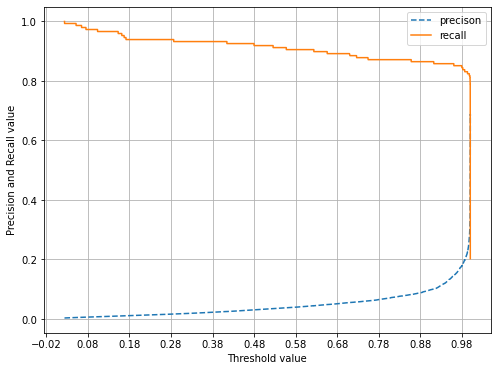

In [46]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [47]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Warning] Unknown parameter: num_leves
[[85290     5]
 [   12   136]]
정확도:0.9998, 정밀도: 0.9645, 재현율: 0.9189, F1:0.9412, AUC:0.9873
